#Preprocessing

##Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualisasi
import seaborn as sns #Visualisasi

from sklearn.impute import KNNImputer #Imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #Visualisasi kata

## Load data


In [ ]:
df = pd.read_csv ('/content/diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


##data understanding


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


mengecek info data, ada 768 baris dan 9 kolom. Dengan float di 8 kolom dan integer di 1 kolom


## Memeriksa Missing value


In [ ]:
df.isnull().sum() #Berdasarkan jumlah

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [ ]:
(df.isnull().sum()/len(df))*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


## Mengatasi Outlier

In [ ]:
# Function to count outliers using IQR
def count_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bpund = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bpund)).sum()

# Count outliers in each numerical column
outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  outlier_counts[col] = count_outliers_iqr(df[col])

# Convert the results into a DataFrame for easier viewing
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

# Display the outlier counts DataFrame
outlier_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,23
7,Age,16
8,Outcome,0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


##EDA


Contoh EDA adalah histogram, boxplot, correlation

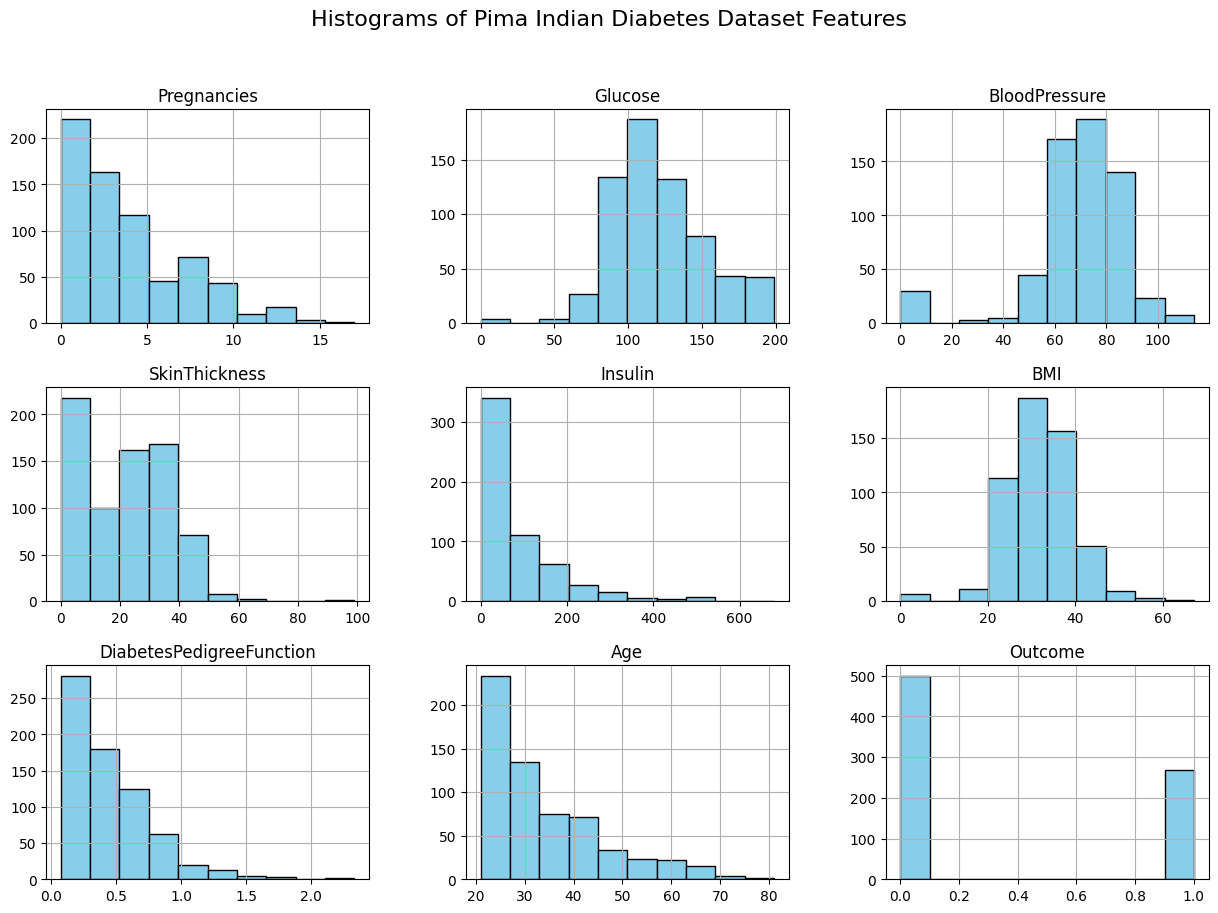

In [ ]:
def plot_histograms(data):
  data.hist(bins=10, figsize=(15, 10), layout=(3,3),
            color='skyblue', edgecolor='black')
  plt.suptitle('Histograms of Pima Indian Diabetes Dataset Features', fontsize=16)
  plt.show()

plot_histograms(df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

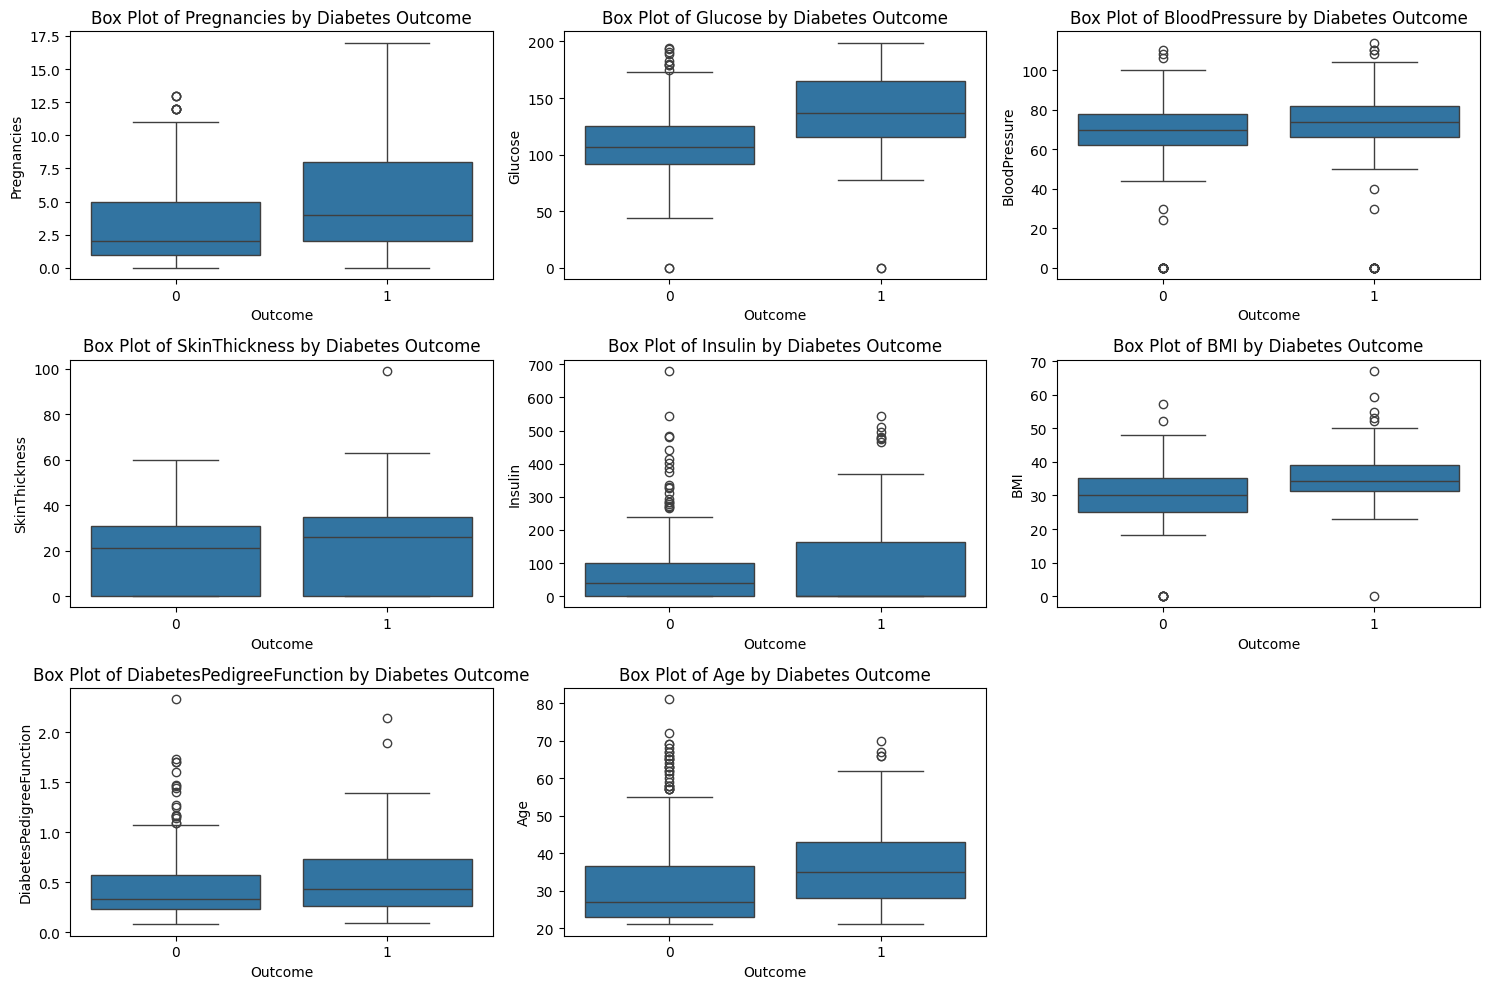

In [ ]:
def plot_boxplot(data):
  plt.figure(figsize=(15, 10))
  for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'Box Plot of {column} by Diabetes Outcome')
  plt.tight_layout()
  plt.show()

plot_boxplot(df)

<Axes: >

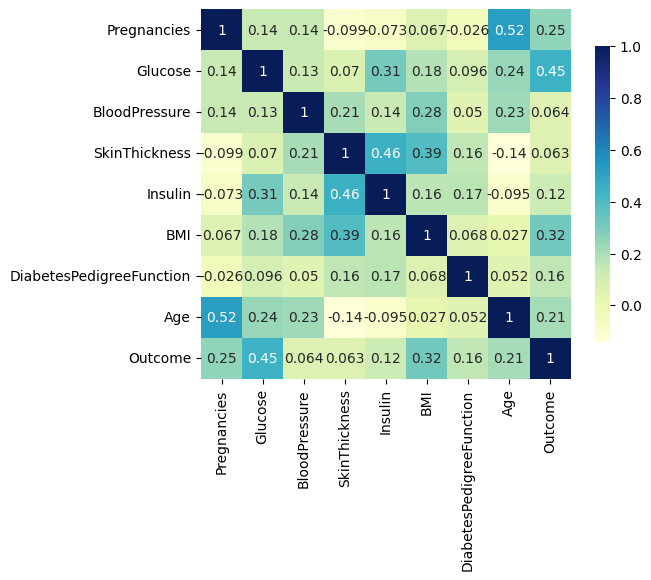

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', square=True, cbar_kws={"shrink": .8})

sns.heatmap(

##Data foodreviews

In [ ]:
df_text = pd.read_excel ('/content/foodreviews.xlsx')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


Visualisasi WordCloud

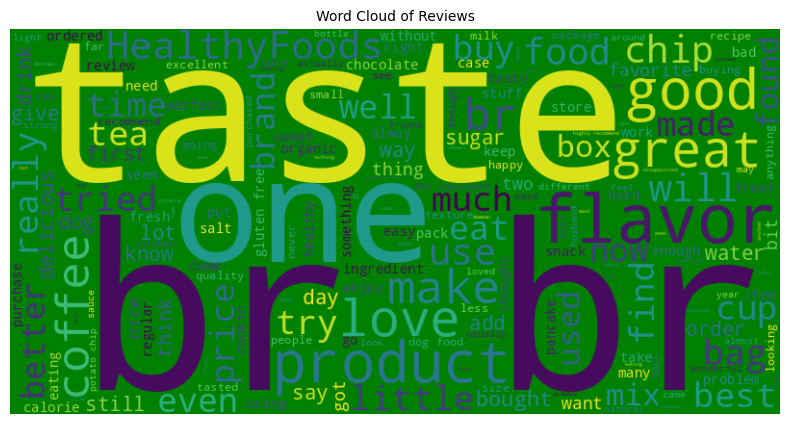

In [ ]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='green',
                        colormap='viridis').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Reviews', fontsize=10)
  plt.show()

plot_wordcloud(text)

##Missing Value Handling // Imputasi Missing Value


Cara mengatasi missing value adalah dengan mengahpus data (baris dan kolom) serta melakukan imputasi (dengan mengisi nilai konstan atau nol, mengisi nilai mean median modus, pakai algoritma kayak KNN dan Random Forrest, Interpolasi khususunya data time series)


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) #Imputasi missing value menggunakan algoritma KNN

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


##Scaling

Beberapa algoritma sensitif pada skala data, contohnya KNN. Karena KNN menggunakan metode perhitungan jarak, dimana perhitungan jarak saat ada variabel yang berbeda satuan, ada kemungkinan perbedaan yang besar dan akirnya timbul bias saat data yang dimasukkan tidak dalam range yang ada. KNN biasanya menggunakan algoritma jarak berupa euclidean distance.
Teknik scallig berupa min-max scaling dan Maxabs scaling.

##Resampling

Digunakan saat terdapat proporsi tidak seimbang pada label. Label yang tidak seimbang memengaruhi kinerja label, karena bias yang dihasilkan juga tinggi.
Cara mengatasi data imbalanced adalah dengan:
1. Undersampling (menambahkan data sintetis pada label yang lebih sedikit)
2. Uppersampling (Menghapus data)
3. Hybridsampling


In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
#Oversampling pakai SMOTE, SMOTE membuat data sintetik untuk oversampling

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

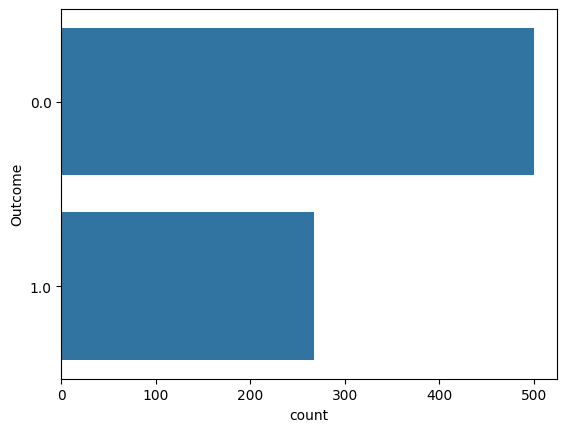

In [ ]:
sns.countplot(data=df, y=y) #visualisasi label sebelum sampling

Dimana terlihat label 1.0 adalah kinoritas dan label 0.0 mayoritas

<Axes: xlabel='count', ylabel='Outcome'>

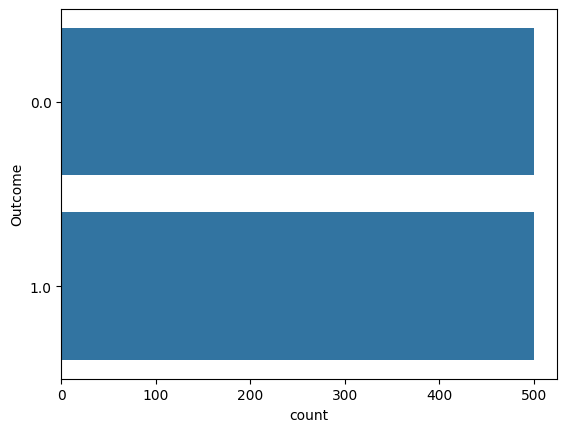

In [ ]:
sns.countplot(data=x_resampled, y=y_resampled) #visualisasi label setelah sampling

In [ ]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

##Handling Outlier

Algoritma yang bisa meng-handling outlier adalah random forest
Outlier dikategorikan sebagai data yang melewati batas atas dan batas bawah.